Pregunta 6 Matias Opazo Pino

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import camb
import pandas as pd

Primero establecemos los parámetros en el tiempo presente como las condiciones iniciales.

In [2]:
# Definir cosmología
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054
omegak = 0.001

# Establecemos parametros
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, omk=omegak)
results = camb.get_results(pars)

Luego la evolución temporal la veremos utilizando el redshift junto con el factor de escala, luego obtenemos la evolución de los parámetros según el redshift.

In [3]:
# Definimos redshifts
zmax = 3000.0
Nz   = 6000
z    = np.linspace(0.0, zmax, Nz)
a    = 1.0/(1.0 + z)

# Calculamos parametro de Hubble
Hz   = results.hubble_parameter(z)

# 3. Extract density parameters
om_k = results.get_Omega('K', z) # curvatura
om_m = results.get_Omega('baryon', z) # masa
om_r = results.get_Omega('photon', z) # radiación
om_de = results.get_Omega('de', z) # dark energy

Por último para graficar utilizaremos el factor de escala como referencia temporal, a medida que este crece hasta el tiempo presente se vuelve uno, esto es válido ya que para cada redsihft que se tenía anteriormente ahora se le asignará su factor de escala correspondiente. Por último para una mejor visualización se le aplicó una escala logaritmica al factor de escala.

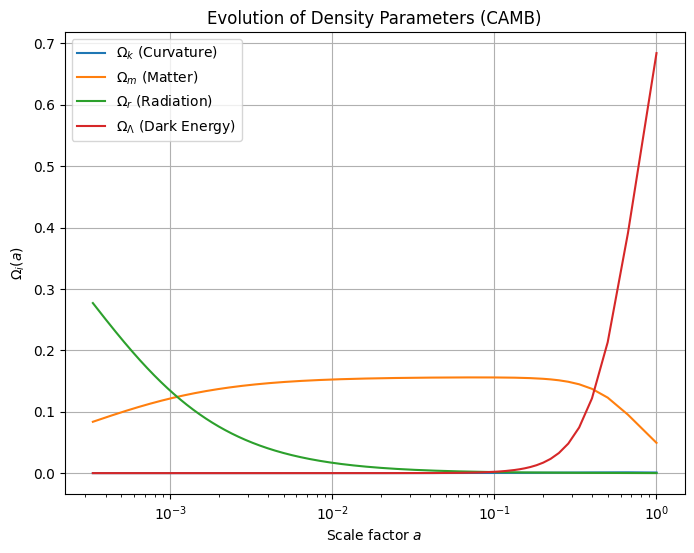

In [6]:
# 4. Plot
plt.figure(figsize=(8,6))

plt.plot(a, om_k, label=r'$\Omega_k$ (Curvature)')
plt.plot(a, om_m, label=r'$\Omega_m$ (Matter)')
plt.plot(a, om_r, label=r'$\Omega_r$ (Radiation)')
plt.plot(a, om_de, label=r'$\Omega_\Lambda$ (Dark Energy)')

plt.xscale("log")  # <<< Aquí está la clave

plt.xlabel('Scale factor $a$')
plt.ylabel(r'$\Omega_i(a)$')
plt.title('Evolution of Density Parameters (CAMB)')
plt.legend()
plt.grid()
plt.show()


Es posible observar la distintas fases de dominación de los parámetros que da lugar a las distintas eras del universo, en principio domina el parámetro de radiación, luego viene la dominación de la materia, por último la dark energy se dispara y termina dominando cerca del tiempo presente hasta ahora. Entonces se pueden ver la evolución de los parámetros solicitados, particularmente asumimos que omega_k,0 era distinto de cero, para los demás se asumieron valores estándar extraídos experimentalmente.

Cabe decir que es importante tener en cuenta qué ocurre con la evolución del parámetro omega_k, esto ya que este parámetro depende directamente de la curvatura K que podría tener el universo. Para el caso dónde K=0 el parámetro omega_k simplemente no evoluciona y se mantiene constante (y nulo) a lo largo de toda la evolución temporal. Por el contrario, cuando omega_k es distinto de cero este si presenta evolución, por lo que este fue el caso que grafiqué para ver como cambia este parámetro en el tiempo. Pese a lo anterior las observaciones del parámetro omega_k muestran que es realmente pequeño, mediciones del 2020 (Planck 2018 results - VI. Cosmological parameters) señalan ΩK,0 = 0.001 ± 0.002, por lo que en el caso extremo fijé ΩK,0 = 0.001, por último, esto si afecta a los demás parámetros debido a la normalización pero ya que ΩK es tan pequeño en comparación a los demás realmente no realiza un gran cambio en la evolución de los demás parámetros en contraste con ΩK,0 = 0.